# A better approach to Agile estimation #

In my [previous notebook](agile_estimation.ipynb) I proposed to use Poisson distribution for estimating the number of story points per iteration, i.e. project velocity. It is a fairly simple distribution, which has one outstanding property: the distribution of the sum of Poisson-distributed random variables also follows Poisson distribution with a parameter being a sum of the individual parameters. This means that the project velocity is the sum of the velocities of the individual developers, as you would intuitively assume!

However, there are problems with Poisson distribution. If you look at its PDF,
$$ p(k) = \frac {\lambda^k e^{-\lambda}}{k!} $$
you see, that it has only one parameter $\lambda$. Moreover, the variance is also $\lambda$, equal to the mean. This raises a question, how do I distinguish between good estimators and lousy estimators. If, for example, I estimate each user story using random number of story points, eventually I will get the same variance as a person, who is accurate in his estimations. 

Another problem is that Poisson distribution assumes that the duration of story points follows Exponential distribution, which has a mode of 0. So this means that a user story most likely take 0 hours to complete? I am sure the project manager would be happy to hear that.

If you, however, start with estimating the duration of each story points, you would have to pick a distribution that has a mode greater than zero. I used Normal distribution once to estimate a story point duration, only to notice, that for some developers the variance was so high, that the left tail would go into the negative territory (the task would take negative time to complete!). So I have to choose a distribution that has support $x \in [0, \infty]$.

I can choose a very popular Gamma distribution, but a better choice is [Log-Normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution).

$$ p(x | \mu,\sigma) = \frac{1}{x \sigma \sqrt{2 \pi}} e^{-\frac{(\ln x - \mu)^2}{2 \sigma^2}}$$

The best property of this distribution is that the inverse distribution is also a Log-normal distribution with the same parameter $\sigma$ and a reversed parameter $-\mu$. This means, that if the story duration is a log-normal distribution, then the project velocity is also a log-normal distribution!

We will use the same example, as we used in the last notebook

In [33]:
import numpy as np
from scipy.stats import lognorm
data=np.array([14, 12,  7, 14, 13])
shape, loc, scale = lognorm.fit(data, floc=0)
fitted = lognorm(shape, loc, scale)
print(f'Mean: {fitted.mean()}')
print(f'Standard deviation {fitted.std()}')
print(f'95% confidence: {fitted.ppf(0.05)}')


Mean: 12.046405137951629
Standard deviation 3.195066701596986
95% confidence: 7.582961342994959


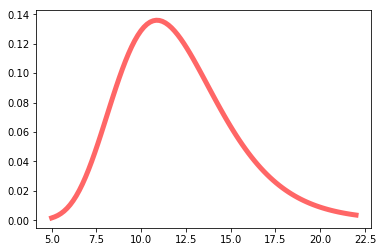

In [34]:
#Let's plot it
%matplotlib inline
import matplotlib.pyplot as plt
def plot_dist(frozen):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(5, 22, 100)
    ax.plot(x, frozen.pdf(x), 'r-', lw=5, alpha=0.6, label='lognorm pdf')
plot_dist(fitted);

So the answer is close to the one given by Poisson distribution. Let's try to get another team that maybe has lower velocity, but more reliable estimates:

In [35]:
data=np.array([10, 11,  12, 10, 11])
shape, loc, scale = lognorm.fit(data, floc=0)
fitted = lognorm(shape, loc, scale)
print(f'Mean: {fitted.mean()}')
print(f'Standard deviation {fitted.std()}')
print(f'95% confidence: {fitted.ppf(0.05)}')

Mean: 10.799871930716652
Standard deviation 0.7427443647589952
95% confidence: 9.62328932436764


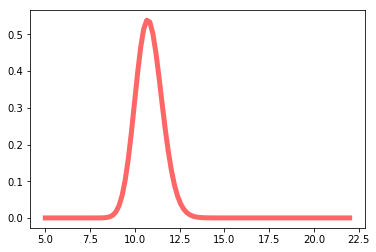

In [36]:
plot_dist(fitted);

We see, that even though the velocity of this team is lower, than of the first team, if the manager asks you for 95% confidence, you can pick the second team, because it can reliably do more story points in the iteration.